<h3> LAB 9 - Janelas</h3>
<h5> Processamento Digital de Sinais I - TE352 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [25]:
# Inicializa os pacotes que serão utilizados
import numpy as np
import matplotlib.pyplot as plt

1) crie vetor x com 16 elementos, uma senoide com 4 ciclos (t=0:15).

In [26]:
t_x = np.linspace(0,15,16)
x = np.sin(np.pi/2*t_x)

2) crie vetor y, acrescentando 240 zeros ao vetor x

In [27]:
y = np.concatenate((x,np.zeros(240)),axis=None)

3) crie vetor z com 256 elementos, uma senoide com a mesma frequência (t=0:255)

In [28]:
t_z = np.linspace(0,255,256)
z = np.sin(np.pi/2*t_z)

4) plot no mesmo eixo os espectros dos tres sinais (para que fiquem com a mesma amplitude máxima, divida da FFT pelo numero de elementos diferente de zero do respectivo vetor no tempo).

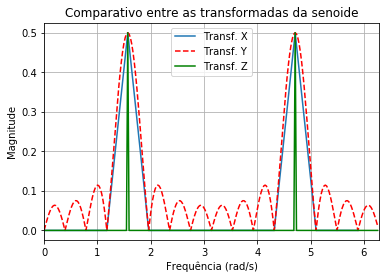

In [29]:
w_16 = np.linspace(0,15,16)*2*np.pi/16
w_256 = np.linspace(0,255,256)*2*np.pi/256;
X = np.fft.fft(x)
Y = np.fft.fft(y)
Z = np.fft.fft(z)

plt.grid(True)
plt.plot(w_16,abs(X)/16)
plt.plot(w_256,abs(Y)/16,'r--')
plt.plot(w_256,abs(Z)/256,'g')
plt.legend(['Transf. X', 'Transf. Y', 
            'Transf. Z'])
plt.title("Comparativo entre as transformadas da senoide")
plt.ylabel ('Magnitude')
plt.xlabel ('Frequência (rad/s)')
plt.xlim (0, 2*np.pi)
plt.show()

5) comente o resultado

<b>R:</b> Nota-se que todos os vetores apresentam frequência central (maior lóbulo) nos mesmos pontos. Comparando a transformada dos vetores x e z, vemos que z ocupa uma área menor, se assemelhando mais da função impulso que representa a transformada do seno do tempo contínuo para a frequência. Assim, quanto mais pontos um mesmo sinal possui, mais próximo sua DFT é da resposta esperada no contínuo. 

Comparando o vetor Y, resultado da transformação de y, vemos que ao adicionarmos zeros ao sinal sua resposta na frequência passa a apresentar lóbulos adicionais. Isto se dá porque os zeros não adicionam mais informação ao vetor, mas tornam a amostragem mais densa. A transformada de y será o produto da convolução do sinal senoidal e da convolução da janela retangular de zeros. Ou seja, o produto de dois impulsos com sinc, que é justamente o constatado no gráfico acima.

6) plot em outra figura, o espectro da janela utilizada (j=[ones(1,16) zeros(1,240)])

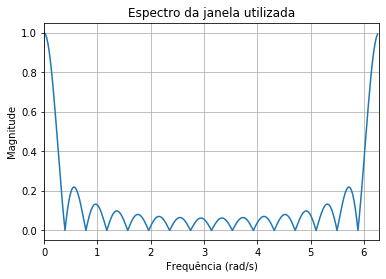

In [30]:
j = np.concatenate((np.ones(16), np.zeros(240)), axis=None)

plt.grid(True)
plt.plot (w_256, abs(np.fft.fft(j))/16)
plt.title("Espectro da janela utilizada")
plt.ylabel ('Magnitude')
plt.xlabel ('Frequência (rad/s)')
plt.xlim (0, 2*np.pi)
plt.show()

7) Em outro grafico, plote as janelas hanning, hammin, bartlett, blackman e retangular no mesmo eixo (com 32 pontos, completando com zero até 128). Use o comando legend(), para especificar a legenda.

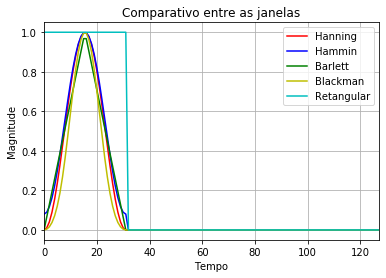

In [31]:
hanning = np.concatenate((np.hanning(32), np.zeros(96)), axis=None)
hamming = np.concatenate((np.hamming(32), np.zeros(96)), axis=None)
bartlett = np.concatenate((np.bartlett(32), np.zeros(96)), axis=None)
blackman = np.concatenate((np.blackman(32), np.zeros(96)), axis=None)
rectangular = np.concatenate((np.ones(32), np.zeros(96)), axis=None)

t = np.linspace(0,127,128)

plt.grid(True)
plt.plot(t,hanning,'r')
plt.plot(t,hamming,'b')
plt.plot(t,bartlett,'g')
plt.plot(t,blackman,'y')
plt.plot(t,rectangular,'c')
plt.legend(['Hanning', 'Hammin', 'Barlett', 'Blackman','Retangular'])
plt.title("Comparativo entre as janelas")
plt.ylabel ('Magnitude')
plt.xlabel ('Tempo')
plt.xlim (0, 127)
plt.show()

8) Em outro grafico, plote os espectros normalizados das janelas (valor máximo igual a 1). Use o comando legend(), para legenda.

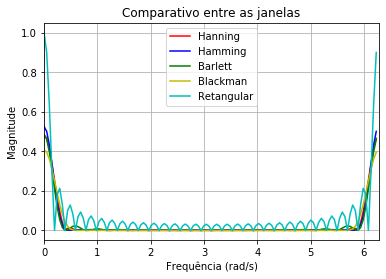

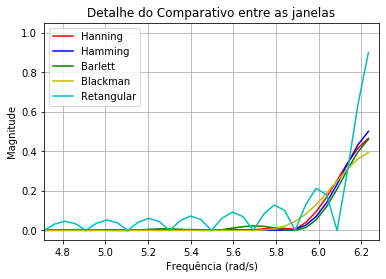

In [32]:
w = t*2*np.pi/128

plt.grid(True)
plt.plot(w,abs((np.fft.fft(hanning)))/32,'r')
plt.plot(w,abs((np.fft.fft(hamming)))/32,'b')
plt.plot(w,abs((np.fft.fft(bartlett)))/32,'g')
plt.plot(w,abs((np.fft.fft(blackman)))/32,'y')
plt.plot(w,abs((np.fft.fft(rectangular)))/32,'c')
plt.legend(['Hanning', 'Hamming', 'Barlett', 'Blackman','Retangular'])
plt.title("Comparativo entre as janelas")
plt.ylabel ('Magnitude')
plt.xlabel ('Frequência (rad/s)')
plt.xlim (0, 2*np.pi)
plt.show()

plt.grid(True)
plt.plot(w,abs((np.fft.fft(hanning)))/32,'r')
plt.plot(w,abs((np.fft.fft(hamming)))/32,'b')
plt.plot(w,abs((np.fft.fft(bartlett)))/32,'g')
plt.plot(w,abs((np.fft.fft(blackman)))/32,'y')
plt.plot(w,abs((np.fft.fft(rectangular)))/32,'c')
plt.legend(['Hanning', 'Hamming', 'Barlett', 'Blackman','Retangular'])
plt.title("Detalhe do Comparativo entre as janelas")
plt.ylabel ('Magnitude')
plt.xlabel ('Frequência (rad/s)')
plt.xlim (1.5*np.pi, 2*np.pi)
plt.show()

9) Qual dessas janelas possui espectro com menor largura do lobulo principal ? E qual dessas janelas possui menor amplitude de lóbulo lateral ?

<b>R:</b> A janela com menor largura no lóbulo principal é a janela retangular e a que possui menor amplitude de lóbulo lateral é a Hamming.